# Libraries

In [ ]:
!pip install pycaret[full]

In [ ]:
!pip install markupsafe==2.0.1

In [ ]:
pip install -U imbalanced-learn

In [ ]:
pip install scikit-learn==0.23.2

In [36]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split, StratifiedKFold , RandomizedSearchCV
import jinja2
from pycaret.classification import*
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import AdaBoostClassifier

# Dataset - model

In [6]:
df_model = pd.read_csv("df_model.csv")

In [7]:
df_model.head(5)

,customer_Dependents,internet_InternetService_DSL,internet_StreamingTV,internet_InternetService_Fiber optic,customer_tenure,account_PaperlessBilling,customer_SeniorCitizen,account_Contract_Two year,internet_OnlineSecurity,internet_StreamingMovies,internet_DeviceProtection,account_PaymentMethod_Electronic check,account_Contract_One year,account_Contract_Month-to-month,internet_InternetService_0,internet_OnlineBackup,account_Charges_Monthly,account_Charges_Monthly_Average,internet_TechSupport,Churn
0,1,1,1,0,9,1,0,0,0,0,0,0,1,0,0,1,65.6,65.922222,1,0
1,0,1,0,0,9,0,0,0,0,1,0,0,0,1,0,0,59.9,60.266667,0,0
2,0,0,0,1,4,1,0,0,0,0,1,1,0,1,0,0,73.9,70.212500,0,1
3,0,0,1,1,13,1,1,0,0,1,1,1,0,1,0,1,98.0,95.219231,0,1
4,0,0,1,1,3,1,1,0,0,0,0,0,0,1,0,0,83.9,89.133333,1,1


# Train test split

In [8]:
df_train, df_test = train_test_split(df_model, train_size=0.7, random_state=123, stratify = df_model['Churn'] )
X_train, X_test, y_train, y_test = df_train.drop(columns=['Churn']),  df_test.drop(columns=['Churn']), df_train['Churn'], df_test['Churn']

In [9]:
df_train['Churn'].value_counts(normalize = True)

0    0.734254
1    0.265746
Name: Churn, dtype: float64

# Balancing

In [10]:
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
df_train_balanced = pd.concat([X_train_resampled, y_train_resampled], axis = 1)

In [11]:
y_train_resampled.value_counts(normalize = True)

0    0.5
1    0.5
Name: Churn, dtype: float64

# Model

In [12]:
# Init setup using pycaret
clf = setup( data = df_train_balanced, target = 'Churn', session_id =123)

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7228, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
# Models
best_models = compare_models(include = ['lr', 'rf', 'et','lightgbm', 'gbc', 'xgboost',  'ada'], sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8391,0.9138,0.8617,0.8249,0.8427,0.6782,0.6792,0.774
ada,Ada Boost Classifier,0.8172,0.8981,0.8586,0.7931,0.8244,0.6343,0.6367,0.214
lightgbm,Light Gradient Boosting Machine,0.8334,0.9149,0.8566,0.8195,0.8372,0.6667,0.6681,0.171
gbc,Gradient Boosting Classifier,0.8219,0.9044,0.8475,0.8068,0.8263,0.6438,0.6452,0.444
lr,Logistic Regression,0.8130,0.8966,0.8356,0.8000,0.8171,0.6260,0.6271,0.884
rf,Random Forest Classifier,0.8292,0.9110,0.8356,0.8254,0.8303,0.6584,0.6588,0.713
et,Extra Trees Classifier,0.8130,0.8955,0.8123,0.8140,0.8128,0.6260,0.6266,0.686


In [18]:
# Predictions for the 3 best models

In [19]:
model_xgboost = create_model('xgboost', random_state = 123 )
predict_xgboost = predict_model(model_xgboost , data = df_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8379,0.9181,0.8425,0.8359,0.8392,0.6759,0.6759
1,0.8458,0.9184,0.8696,0.8302,0.8494,0.6917,0.6925
2,0.8636,0.9262,0.8854,0.8485,0.8665,0.7273,0.7280
3,0.8241,0.9025,0.8419,0.8130,0.8272,0.6482,0.6486
4,0.8103,0.8928,0.8577,0.7834,0.8189,0.6206,0.6234
5,0.8399,0.9050,0.8775,0.8162,0.8457,0.6798,0.6818
6,0.8261,0.9073,0.8300,0.8235,0.8268,0.6522,0.6522
7,0.8419,0.9203,0.8735,0.8216,0.8467,0.6838,0.6852
8,0.8439,0.9225,0.8419,0.8452,0.8436,0.6877,0.6878


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7597,0.8135,0.6346,0.541,0.5841,0.4166,0.4193


In [20]:
model_ada = create_model('ada', random_state = 123 )
predict_ada = predict_model(model_ada , data = df_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8103,0.8999,0.8425,0.7926,0.8168,0.6205,0.6217
1,0.8439,0.9133,0.8775,0.8222,0.8489,0.6877,0.6893
2,0.8162,0.8993,0.8577,0.7920,0.8235,0.6324,0.6346
3,0.8063,0.8869,0.8379,0.7881,0.8123,0.6126,0.6139
4,0.8043,0.8877,0.8419,0.7831,0.8114,0.6087,0.6104
5,0.8123,0.8955,0.8696,0.7801,0.8224,0.6245,0.6286
6,0.8123,0.8878,0.8379,0.7970,0.8170,0.6245,0.6253
7,0.8399,0.9190,0.8893,0.8094,0.8475,0.6798,0.6832
8,0.7984,0.8862,0.8379,0.7766,0.8061,0.5968,0.5987


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7564,0.8287,0.7273,0.5306,0.6135,0.442,0.4537


In [21]:
model_lightgbm = create_model('lightgbm', random_state = 123 )
predict_lightgbm = predict_model(model_lightgbm , data = df_test)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8419,0.9168,0.8425,0.8425,0.8425,0.6838,0.6838
1,0.8439,0.9195,0.8656,0.8295,0.8472,0.6877,0.6884
2,0.8439,0.9221,0.8656,0.8295,0.8472,0.6877,0.6884
3,0.8379,0.9046,0.8696,0.8178,0.8429,0.6759,0.6772
4,0.8004,0.8923,0.8300,0.7836,0.8061,0.6008,0.6018
5,0.8123,0.9121,0.8775,0.7762,0.8237,0.6245,0.6299
6,0.8281,0.9103,0.8340,0.8242,0.8291,0.6561,0.6562
7,0.8419,0.9293,0.8735,0.8216,0.8467,0.6838,0.6852
8,0.8360,0.9197,0.8142,0.8512,0.8323,0.6719,0.6726


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7725,0.8238,0.6613,0.5613,0.6072,0.4486,0.4516


In [23]:
# Baseline
y_test.value_counts(normalize = True)
# The choosen model is AdaBoost because it is above the baseline and it has the best recall

0    0.734123
1    0.265877
Name: Churn, dtype: float64

# Model Tunning

In [24]:
# Cross validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [25]:
# Grid of params
grid = dict()
grid['learning_rate'] = [0.01, 0.02, 0.03, 0.04, 0.05]
grid['n_estimators'] = range(50,300)

In [27]:
# Search best params
random_search = RandomizedSearchCV(AdaBoostClassifier(), grid, n_iter=20, cv=skf, verbose=1, random_state=123)

In [28]:
random_search.fit(X_train_resampled , y_train_resampled)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  4.2min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=True),
                   error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05],
                                        'n_estimators': range(50, 300)},
                   pre_dispatch='2*n_jobs', random_state=123, refit=True,
                   return_train_score=False, scoring=None, verbose=1)

In [29]:
random_search.best_params_

{'n_estimators': 248, 'learning_rate': 0.05}

In [30]:
random_search.best_score_

0.7948222817362253

In [31]:
# Model tuned
model_tune_random_search = AdaBoostClassifier(**random_search.best_params_)

In [32]:
model_tune_random_search

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=248, random_state=None)

In [33]:
# fit model tuned
model_tuned = model_tune_random_search.fit(X_train_resampled, y_train_resampled)

# Metrics

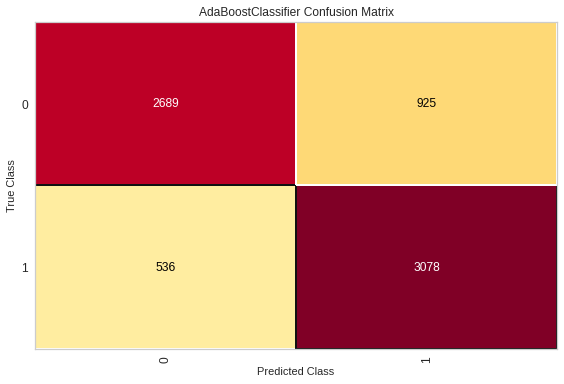

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [34]:
# Model confusion matrix
model_cm = ConfusionMatrix(
    model_tuned )

model_cm.fit(X_train_resampled, y_train_resampled)
model_cm.score(X_train_resampled, y_train_resampled)
model_cm.show()

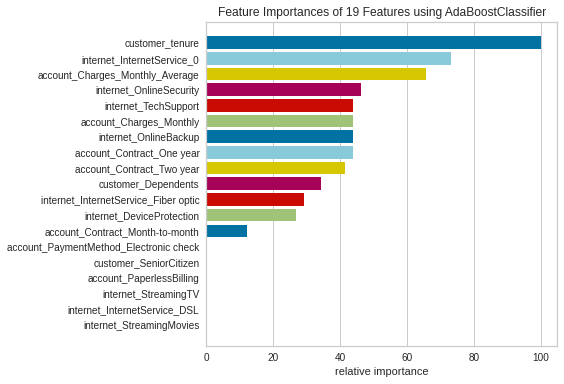

<AxesSubplot:title={'center':'Feature Importances of 19 Features using AdaBoostClassifier'}, xlabel='relative importance'>

In [37]:
# Feature Importance
viz = FeatureImportances(model_tuned)
viz.fit(X_train_resampled, y_train_resampled)
viz.show()

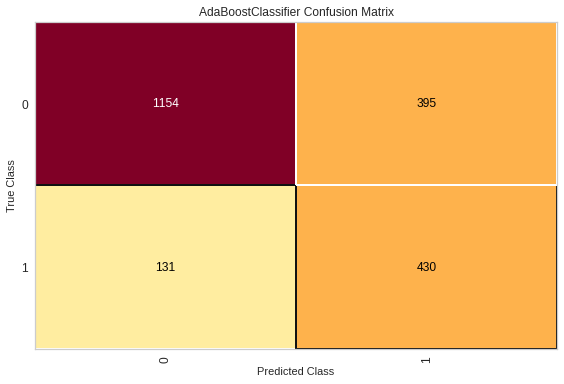

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [38]:
# Test confusion matrix
test_cm = ConfusionMatrix(
    model_tuned )

test_cm.fit(X_train_resampled, y_train_resampled)
test_cm.score(X_test, y_test)
test_cm.show()

In [39]:
# Baseline
y_test.value_counts(normalize = True)

0    0.734123
1    0.265877
Name: Churn, dtype: float64

In [40]:
metrics = {'Baseline': 0.73,'Accuracy_test' :[round(accuracy_score(y_test, model_tuned.predict(X_test)), 2)],
          'Recall_train': [round(recall_score(y_train_resampled, model_tuned.predict(X_train_resampled)), 2)],'Recall_test': [round(recall_score(y_test, model_tuned.predict(X_test)), 2)], 
          'Precision_train': [round(precision_score(y_train_resampled , model_tuned.predict(X_train_resampled)), 2)],'Precision_test': [round(precision_score(y_test, model_tuned.predict(X_test)), 2)], 'Recall_test': [round(recall_score(y_test, model_tuned.predict(X_test)), 2)], 
          }
          
df_metrics = pd.DataFrame(data= metrics)
df_metrics

,Baseline,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test
0,0.73,0.75,0.85,0.77,0.77,0.52


In [41]:
# Metrics by class
print(classification_report(y_test, model_tuned.predict(X_test))) 

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1549
           1       0.52      0.77      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.75      0.76      2110



# Conclusions



- The model choosen is AdaBoost

- The train metrics to the model are:
  - acuracy 0.75
  - precision 0.77
  - recall 0.85

- The most important feature in this model is customer tenure

- The accuracy is 0.75, considering that the test dataset is unbalanced (0.73 for class 0 and 0.27 for class 1) the model predicts a little bit better than the baseline

- The recall (sensitivity) in the test dataset is 0.77 wich means that in 100 predictions using this model 77 of positive class are correctly predicted and 23 are incorrectly

- Next steps:
  - colect more data to build a more robust model (especialy to increase accuracy and precision)
  - deployment
